## Задания
Проект состоит из двух частей:
В первой части вы решите несколько задач в SQL-тренажёре, чтобы закрепить пройденный материал.
Вторая часть проекта — аналитическая. Проверять задачи по-прежнему будет тренажёр. Однако мы рекомендуем самостоятельно анализировать полученные результаты и формулировать выводы.
Внимательно читайте условия. Формулировки задач в проекте приближены к реальной жизни. В работе часто встретятся такие формулировки: «рассчитать LTV за последние 30 дней», «отобразить самых активных покупателей» или даже «определить, почему в компании упали продажи».
В самостоятельном проекте вы будете работать с базой данных StackOverflow — сервиса вопросов и ответов о программировании. StackOverflow похож на социальную сеть — пользователи сервиса задают вопросы, отвечают на посты, оставляют комментарии и ставят оценки другим ответам.
Вы будете работать с версией базы, где хранятся данные о постах за 2008 год, но в таблицах вы найдёте информацию и о более поздних оценках, которые эти посты получили.

## Схема базы данных

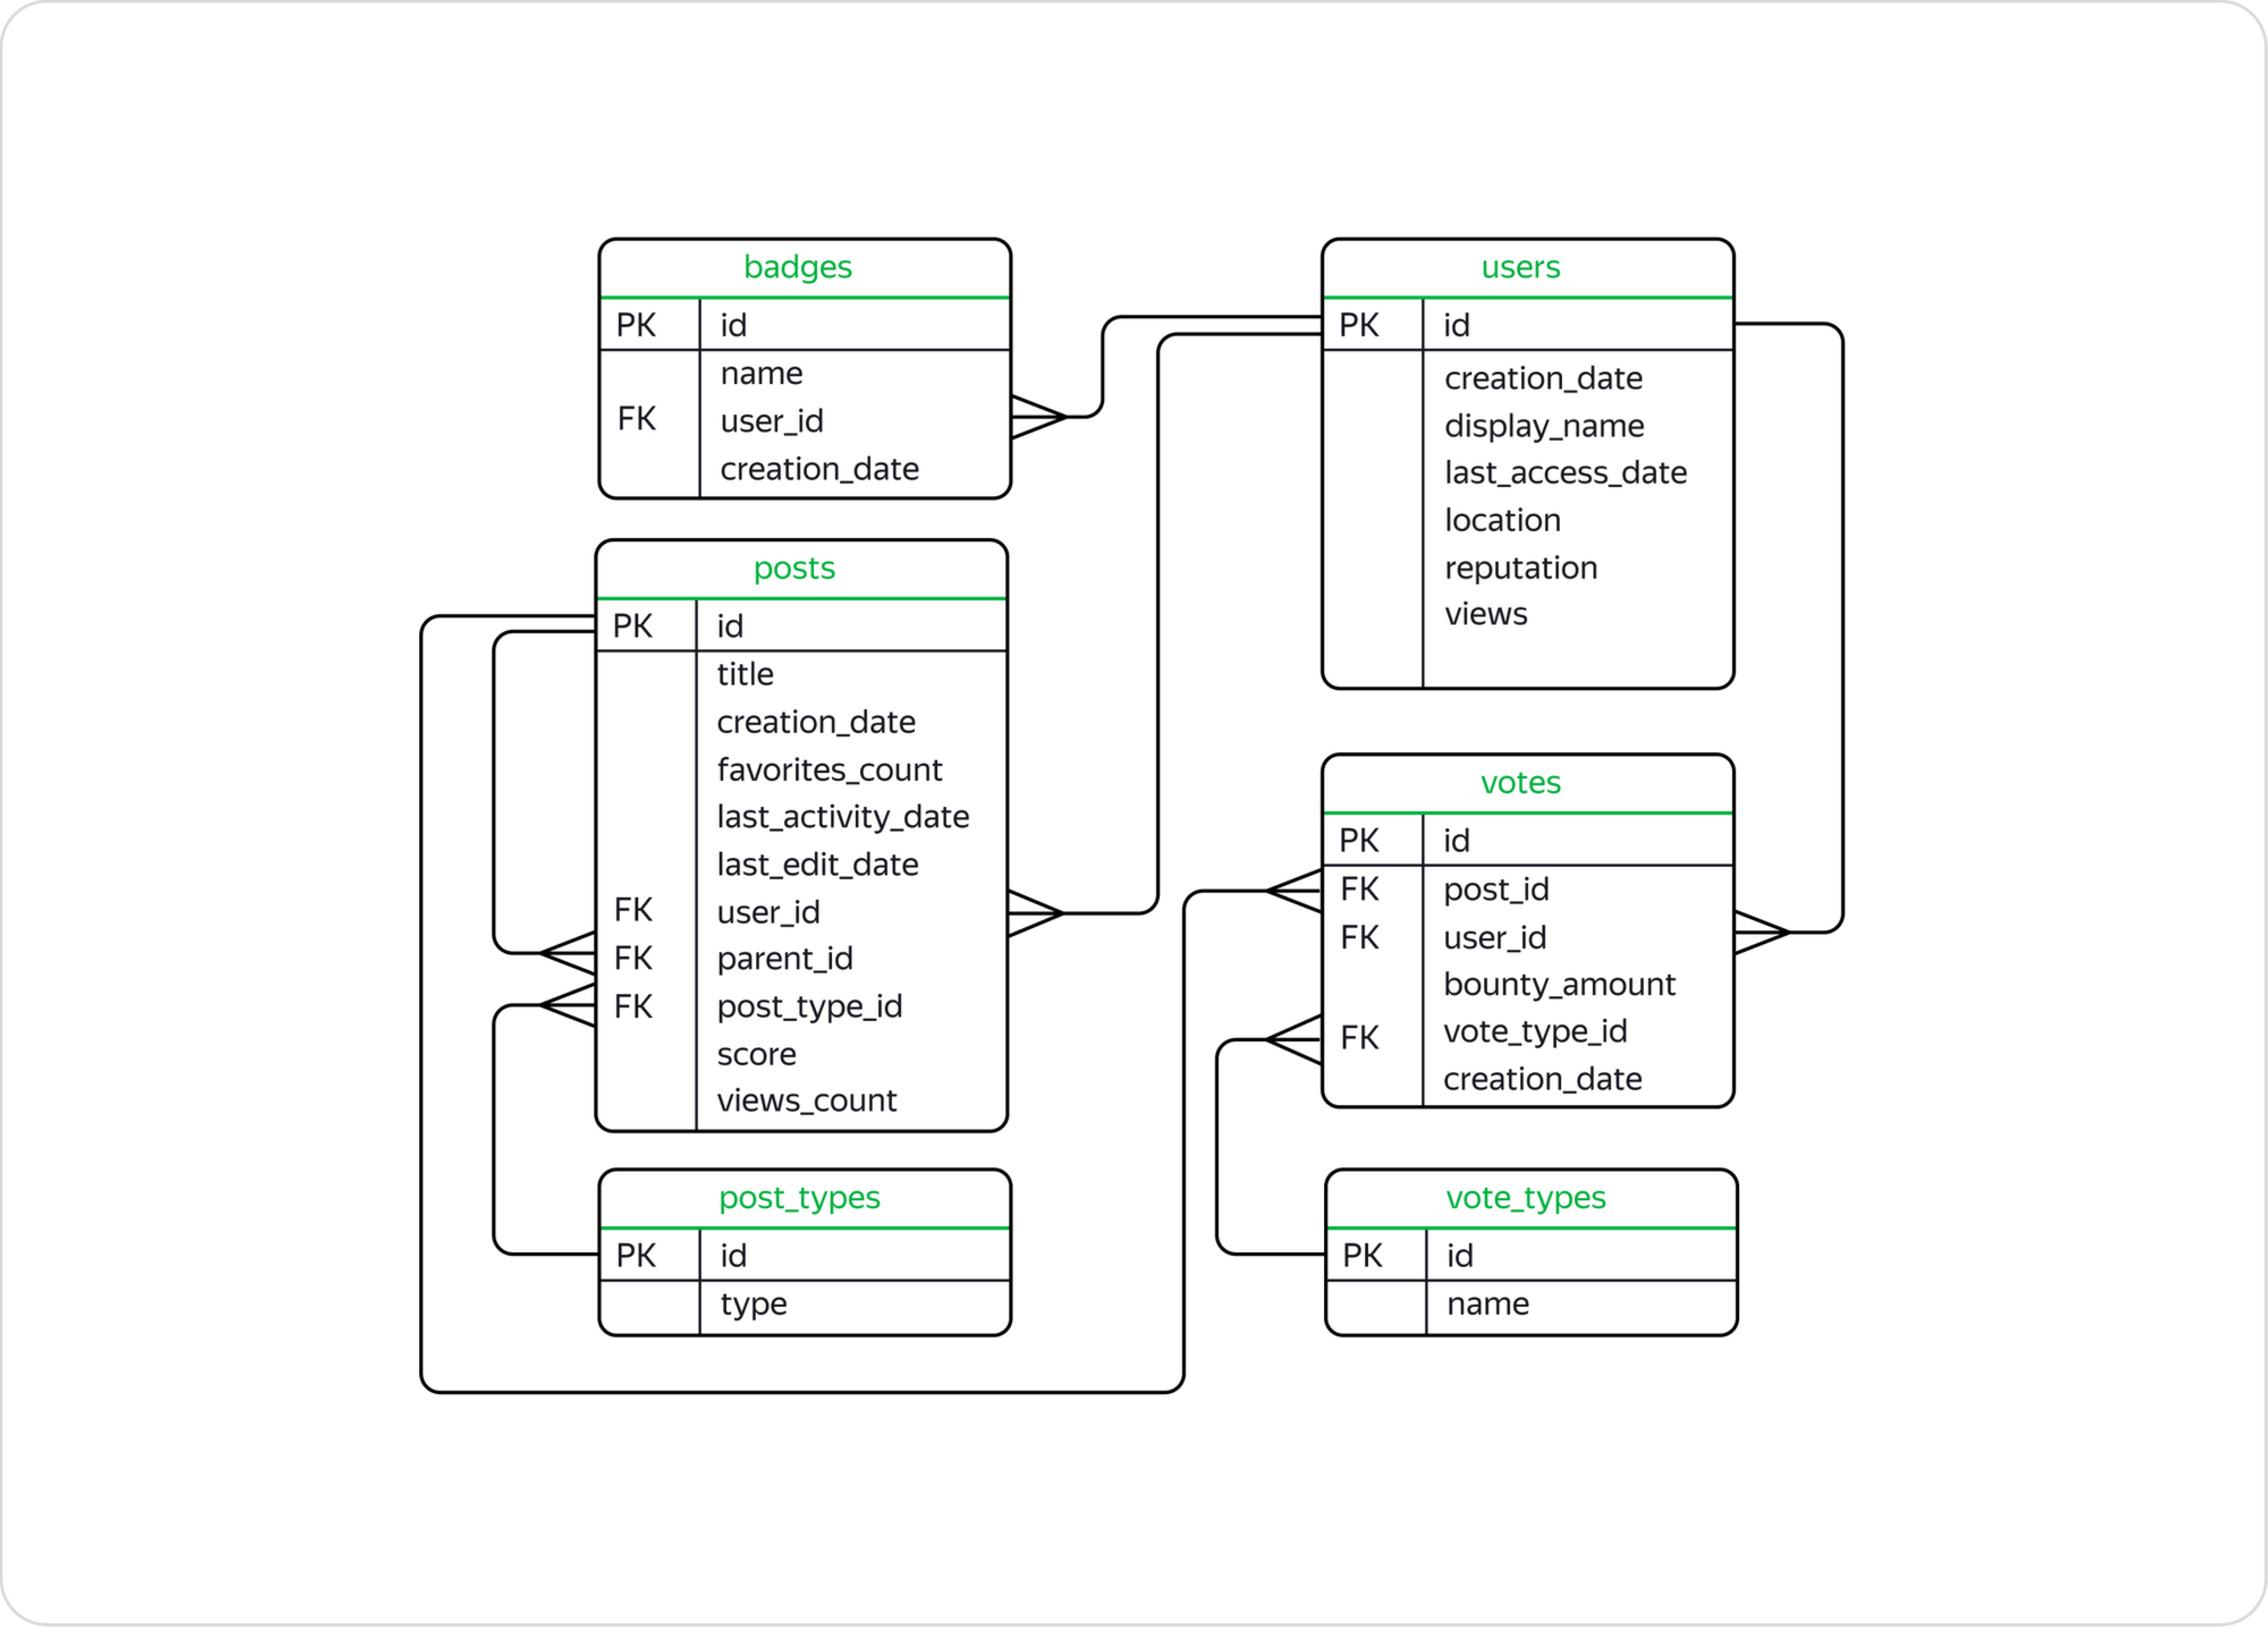

**Таблица** **`stackoverflow.badges`**

Хранит информацию о значках, которые присуждаются за разные достижения. Например, пользователь, правильно ответивший на большое количество вопросов про PostgreSQL, может получить значок postgresql.

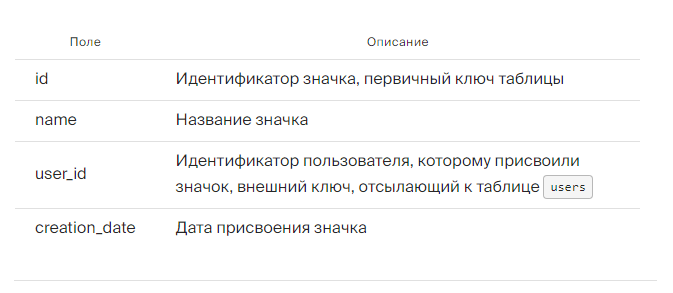

-----

**Таблица** **`stackoverflow.post_types`**

Содержит информацию о типе постов. Их может быть два:

* `Question` — пост с вопросом;

* `Answer` — пост с ответом.

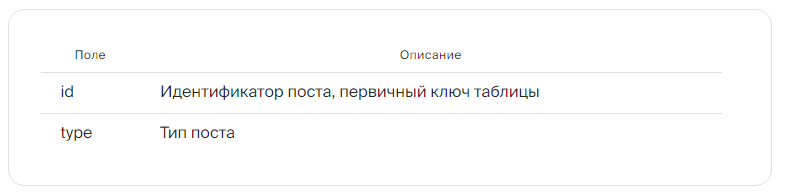

-----

**Таблица** `stackoverflow.posts`

Содержит информацию о постах.

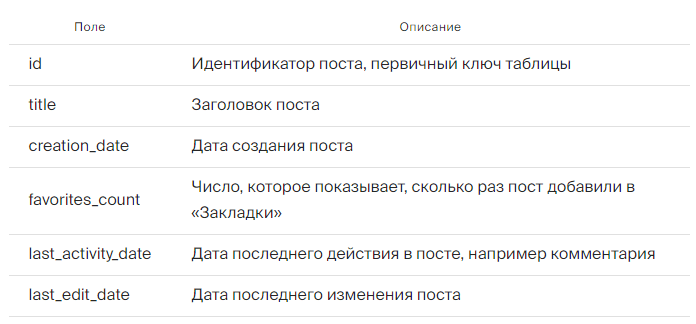
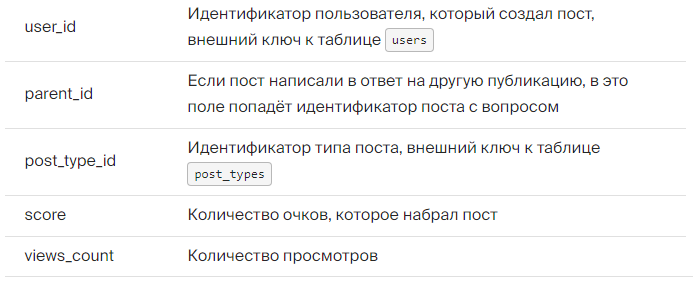

-----

**Таблица** **`stackoverflow.users`**

Содержит информацию о пользователях.

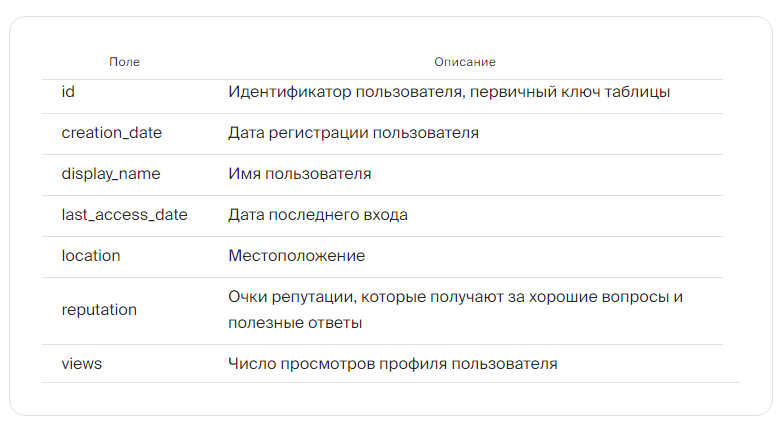

-----

**Таблица** **`stackoverflow.vote_types`**

Содержит информацию о типах голосов. Голос — это метка, которую пользователи ставят посту. Типов бывает несколько:

* `UpMod` — такую отметку получают посты с вопросами или ответами, которые пользователи посчитали уместными и полезными.
* `DownMod` — такую отметку получают посты, которые показались пользователям наименее полезными.
* `Close` — такую метку ставят опытные пользователи сервиса, если заданный вопрос нужно доработать или он вообще не подходит для платформы.
* `Offensive` — такую метку могут поставить, если пользователь ответил на вопрос в грубой и оскорбительной манере, например, указав на неопытность автора поста.
* `Spam` — такую метку ставят в случае, если пост пользователя выглядит откровенной рекламой.

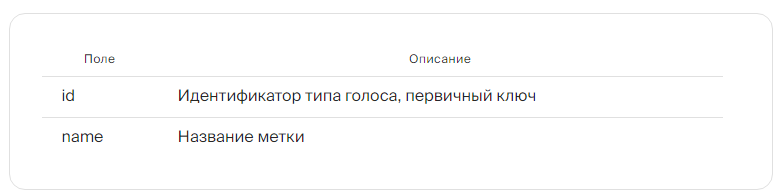

-----

**Таблица** **`stackoverflow.votes`**

Содержит информацию о голосах за посты.

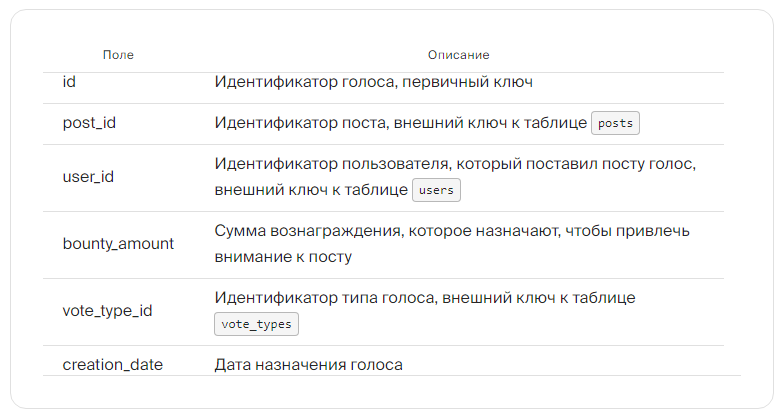

# Задания


# **Проект: Продвинутый SQL. Первая часть.**

### 1. Найдите количество вопросов, которые набрали больше 300 очков или как минимум 100 раз были добавлены в «Закладки».

**РЕШЕНИЕ:**

In [1]:
a="""
SELECT count(*)
FROM stackoverflow.post_types AS pt
LEFT JOIN stackoverflow.posts AS p ON pt.id = p.post_type_id
WHERE type = 'Question'
	AND (
		score > 300
		OR favorites_count >= 100
		)
"""
print(a)


SELECT count(*)
FROM stackoverflow.post_types AS pt
LEFT JOIN stackoverflow.posts AS p ON pt.id = p.post_type_id
WHERE type = 'Question'
	AND (
		score > 300
		OR favorites_count >= 100
		)



-----

### 2. Сколько в среднем в день задавали вопросов с 1 по 18 ноября 2008 включительно? Результат округлите до целого числа.

In [2]:
a="""
WITH t1
AS (
	SELECT date_trunc('day', creation_date)
		,count(*) AS cnt
	FROM StackOverflow.posts AS p
	LEFT JOIN StackOverflow.post_types AS pt ON pt.id = p.post_type_id
	WHERE creation_date::DATE >= '2008-11-01'
		AND creation_date::DATE <= '2008-11-18'
		AND type = 'Question'
	GROUP BY date_trunc('day', creation_date)
	)
SELECT round(avg(cnt))
FROM t1
"""
print(a)


WITH t1
AS (
	SELECT date_trunc('day', creation_date)
		,count(*) AS cnt
	FROM StackOverflow.posts AS p
	LEFT JOIN StackOverflow.post_types AS pt ON pt.id = p.post_type_id
	WHERE creation_date::DATE >= '2008-11-01'
		AND creation_date::DATE <= '2008-11-18'
		AND type = 'Question'
	GROUP BY date_trunc('day', creation_date)
	)
SELECT round(avg(cnt))
FROM t1 



-----

### 3. Сколько пользователей получили значки сразу в день регистрации? Выведите количество уникальных пользователей.

In [3]:
a="""
SELECT count(DISTINCT user_id)
FROM StackOverflow.badges AS b
INNER JOIN StackOverflow.users AS u ON b.user_id = u.id
WHERE b.creation_date::DATE = u.creation_date::DATE
"""
print(a)


SELECT count(DISTINCT user_id)
FROM StackOverflow.badges AS b
INNER JOIN StackOverflow.users AS u ON b.user_id = u.id
WHERE b.creation_date::DATE = u.creation_date::DATE



-----

### 4. Сколько уникальных постов пользователя с именем Joel Coehoorn получили хотя бы один голос?

In [4]:
a="""
SELECT count(DISTINCT p.id)
FROM StackOverflow.posts AS p
INNER JOIN StackOverflow.users AS u ON p.user_id = u.id
INNER JOIN StackOverflow.votes AS v ON p.id = v.post_id
WHERE display_name = 'Joel Coehoorn'
"""
print(a)


SELECT count(DISTINCT p.id)
FROM StackOverflow.posts AS p
INNER JOIN StackOverflow.users AS u ON p.user_id = u.id
INNER JOIN StackOverflow.votes AS v ON p.id = v.post_id
WHERE display_name = 'Joel Coehoorn'



-----

### 5. Выгрузите все поля таблицы `vote_types`. Добавьте к таблице поле `rank`, в которое войдут номера записей в обратном порядке. Таблица должна быть отсортирована по полю `id`.

In [5]:
a="""
SELECT *
	,row_number() OVER (
		ORDER BY id DESC
		)
FROM StackOverflow.vote_types
ORDER BY id
"""
print(a)


SELECT *
	,row_number() OVER (
		ORDER BY id DESC
		)
FROM StackOverflow.vote_types
ORDER BY id



-----

### 6. Отберите 10 пользователей, которые поставили больше всего голосов типа `Close`. Отобразите таблицу из двух полей: идентификатором пользователя и количеством голосов. Отсортируйте данные сначала по убыванию количества голосов, потом по убыванию значения идентификатора пользователя.

In [6]:
a="""
SELECT user_id,
  count(*) AS cnt
FROM StackOverflow.votes AS v
INNER JOIN StackOverflow.vote_types AS vt ON v.vote_type_id = vt.id
WHERE NAME = 'Close'
GROUP BY user_id
ORDER BY cnt DESC,
  user_id DESC limit 10
"""
print(a)


SELECT user_id,
  count(*) AS cnt
FROM StackOverflow.votes AS v
INNER JOIN StackOverflow.vote_types AS vt ON v.vote_type_id = vt.id
WHERE NAME = 'Close'
GROUP BY user_id
ORDER BY cnt DESC,
  user_id DESC limit 10



-----

### 7. Отберите 10 пользователей по количеству значков, полученных в период с 15 ноября по 15 декабря 2008 года включительно.
### Отобразите несколько полей:
 * ### идентификатор пользователя;
 * ### число значков;
 * ### место в рейтинге — чем больше значков, тем выше рейтинг.

### Пользователям, которые набрали одинаковое количество значков, присвойте одно и то же место в рейтинге.
### Отсортируйте записи по количеству значков по убыванию, а затем по возрастанию значения идентификатора пользователя.

In [7]:
a="""
SELECT user_id,
        count(*),
        dense_rank() OVER (ORDER BY count(*) DESC)
FROM StackOverflow.users AS u
INNER JOIN StackOverflow.badges AS b ON u.id = b.user_id
WHERE b.creation_date::DATE >= '2008-11-15'
	    AND b.creation_date::DATE <= '2008-12-15'
GROUP BY user_id
ORDER BY count(*) DESC,
          user_id limit 10
"""
print(a)


SELECT user_id,
        count(*),
        dense_rank() OVER (ORDER BY count(*) DESC)
FROM StackOverflow.users AS u
INNER JOIN StackOverflow.badges AS b ON u.id = b.user_id
WHERE b.creation_date::DATE >= '2008-11-15'
	    AND b.creation_date::DATE <= '2008-12-15'
GROUP BY user_id
ORDER BY count(*) DESC,
          user_id limit 10



-----

### 8. Сколько в среднем очков получает пост каждого пользователя?
###  Сформируйте таблицу из следующих полей:
* ### заголовок поста;
* ### идентификатор пользователя;
* ### число очков поста;
* ### среднее число очков пользователя за пост, округлённое до целого числа.

### Не учитывайте посты без заголовка, а также те, что набрали ноль очков.

In [8]:
a="""
SELECT title,
        user_id,
        score,
        round(avg(score) OVER (PARTITION BY user_id))
FROM StackOverflow.users AS u
FULL JOIN StackOverflow.posts AS p ON u.id = p.user_id
WHERE title IS NOT NULL
	    AND score != 0
"""
print(a)


SELECT title,
        user_id,
        score,
        round(avg(score) OVER (PARTITION BY user_id))
FROM StackOverflow.users AS u
FULL JOIN StackOverflow.posts AS p ON u.id = p.user_id
WHERE title IS NOT NULL
	    AND score != 0



-----

### 9. Отобразите заголовки постов, которые были написаны пользователями, получившими более 1000 значков. Посты без заголовков не должны попасть в список.

In [9]:
a="""
SELECT title
FROM StackOverflow.posts
WHERE user_id IN (
      SELECT user_id
      FROM StackOverflow.badges AS b
      GROUP BY user_id
      HAVING count(*) > 1000
      )
	    AND title IS NOT NULL

"""
print(a)


SELECT title
FROM StackOverflow.posts
WHERE user_id IN (
      SELECT user_id
      FROM StackOverflow.badges AS b
      GROUP BY user_id
      HAVING count(*) > 1000
      )
	    AND title IS NOT NULL




-----

### 10. Напишите запрос, который выгрузит данные о пользователях из США (англ. United States). Разделите пользователей на три группы в зависимости от количества просмотров их профилей:
* ### пользователям с числом просмотров больше либо равным 350 присвойте группу `1`;
* ### пользователям с числом просмотров меньше 350, но больше либо равно 100 — группу `2`;
* ### пользователям с числом просмотров меньше 100 — группу `3`.

### Отобразите в итоговой таблице идентификатор пользователя, количество просмотров профиля и группу. Пользователи с нулевым количеством просмотров не должны войти в итоговую таблицу.

In [10]:
a="""
SELECT id,
        VIEWS,
        CASE
            WHEN VIEWS >= 350
              THEN 1
            WHEN VIEWS < 350
                  AND VIEWS >= 100
              THEN 2
            WHEN VIEWS < 100
              THEN 3
          END
FROM StackOverflow.users AS u
WHERE location LIKE '%United States%'
	AND VIEWS != 0
"""
print(a)


SELECT id,
        VIEWS,
        CASE 
            WHEN VIEWS >= 350
              THEN 1
            WHEN VIEWS < 350
                  AND VIEWS >= 100
              THEN 2
            WHEN VIEWS < 100
              THEN 3
          END
FROM StackOverflow.users AS u
WHERE location LIKE '%United States%'
	AND VIEWS != 0



-----

### 11. Дополните предыдущий запрос. Отобразите лидеров каждой группы — пользователей, которые набрали максимальное число просмотров в своей группе. Выведите поля с идентификатором пользователя, группой и количеством просмотров. Отсортируйте таблицу по убыванию просмотров, а затем по возрастанию значения идентификатора.

In [11]:
a="""
WITH t2 AS (WITH t1 AS   (    SELECT id,
                                        views,
                                        CASE
                                            WHEN views >= 350
                                              THEN 1
                                            WHEN views < 350
                                                  AND views >= 100
                                              THEN 2
                                            WHEN views < 100
                                              THEN 3
                                        END AS group1
                              FROM StackOverflow.users AS u
                              WHERE location LIKE '%United States%'
                                    AND views != 0
                              )
              SELECT *,
                      max(views) OVER (PARTITION BY group1 ORDER BY views DESC) AS mx
              FROM t1
              )
SELECT id,
        group1,
        views
FROM t2
WHERE mx = views
ORDER BY views DESC,
          id
"""
print(a)


WITH t2 AS (WITH t1 AS   (    SELECT id,
                                        views,
                                        CASE 
                                            WHEN views >= 350
                                              THEN 1
                                            WHEN views < 350
                                                  AND views >= 100
                                              THEN 2
                                            WHEN views < 100
                                              THEN 3
                                        END AS group1
                              FROM StackOverflow.users AS u
                              WHERE location LIKE '%United States%'
                                    AND views != 0
                              )
              SELECT *,
                      max(views) OVER (PARTITION BY group1 ORDER BY views DESC) AS mx
              FROM t1
              )
SELECT id,
        group1,
        views
F

-----

### 12. Посчитайте ежедневный прирост новых пользователей в ноябре 2008 года. Сформируйте таблицу с полями:
* ### номер дня;
* ### число пользователей, зарегистрированных в этот день;
* ### сумму пользователей с накоплением.

In [12]:
a="""
WITH t1 AS (SELECT extract(day FROM creation_date) AS nov_day,
                    count(*) AS user_per_day
            FROM StackOverflow.users
            WHERE creation_date::DATE >= '2008-11-01'
                  AND creation_date::DATE < '2008-12-01'
            GROUP BY nov_day
            )
SELECT *,
        sum(user_per_day) OVER (ORDER BY nov_day)
FROM t1
"""
print(a)


WITH t1 AS (SELECT extract(day FROM creation_date) AS nov_day,
                    count(*) AS user_per_day
            FROM StackOverflow.users
            WHERE creation_date::DATE >= '2008-11-01'
                  AND creation_date::DATE < '2008-12-01'
            GROUP BY nov_day
            )
SELECT *,
        sum(user_per_day) OVER (ORDER BY nov_day)
FROM t1



-----

### 13. Для каждого пользователя, который написал хотя бы один пост, найдите интервал между регистрацией и временем создания первого поста.
### Отобразите:
* ### идентификатор пользователя;
* ### разницу во времени между регистрацией и первым постом.

In [13]:
a="""
WITH t1 AS (SELECT user_id,
                    min(creation_date) AS first_post
            FROM StackOverflow.posts
            GROUP BY user_id
            ),
t2 AS (SELECT id,
              min(creation_date) AS registration_date
        FROM StackOverflow.users
        GROUP BY id
        )
SELECT user_id,
        first_post - registration_date
FROM t1
INNER JOIN t2 ON t1.user_id = t2.id
"""
print(a)


WITH t1 AS (SELECT user_id,
                    min(creation_date) AS first_post
            FROM StackOverflow.posts
            GROUP BY user_id
            ),
t2 AS (SELECT id,
              min(creation_date) AS registration_date
        FROM StackOverflow.users
        GROUP BY id
        )
SELECT user_id,
        first_post - registration_date
FROM t1
INNER JOIN t2 ON t1.user_id = t2.id



-----

# **Проект: Продвинутый SQL. Вторая часть.**

### 1. Выведите общую сумму просмотров постов за каждый месяц 2008 года. Если данных за какой-либо месяц в базе нет, такой месяц можно пропустить. Результат отсортируйте по убыванию общего количества просмотров.

In [14]:
a="""
SELECT date_trunc('month', creation_date)::DATE AS month8,
        sum(views_count) AS sm
FROM stackoverflow.posts
WHERE extract(year FROM creation_date) = 2008
GROUP BY month8
ORDER BY sm DESC
"""
print(a)


SELECT date_trunc('month', creation_date)::DATE AS month8,
        sum(views_count) AS sm
FROM stackoverflow.posts
WHERE extract(year FROM creation_date) = 2008
GROUP BY month8
ORDER BY sm DESC



-----

### 2. Выведите имена самых активных пользователей, которые в первый месяц после регистрации (включая день регистрации) дали больше 100 ответов. Вопросы, которые задавали пользователи, не учитывайте. Для каждого имени пользователя выведите количество уникальных значений `user_id`. Отсортируйте результат по полю с именами в лексикографическом порядке.

In [15]:
a="""
WITH t1 AS (SELECT *,
                    cast(u.creation_date + interval '1 month' AS DATE) AS delta,
                    count(p.id) OVER (PARTITION BY display_name) AS cnt
            FROM stackoverflow.posts AS p
            INNER JOIN stackoverflow.users AS u ON p.user_id = u.id
            WHERE post_type_id = 2
                  AND p.creation_date::DATE <= u.creation_date::DATE + interval '1 month'
	          )
SELECT display_name,
        count(DISTINCT user_id)
FROM t1
WHERE cnt > 100
GROUP BY display_name
ORDER BY display_name
"""
print(a)


WITH t1 AS (SELECT *,
                    cast(u.creation_date + interval '1 month' AS DATE) AS delta,
                    count(p.id) OVER (PARTITION BY display_name) AS cnt
            FROM stackoverflow.posts AS p
            INNER JOIN stackoverflow.users AS u ON p.user_id = u.id
            WHERE post_type_id = 2
                  AND p.creation_date::DATE <= u.creation_date::DATE + interval '1 month'
	          )
SELECT display_name,
        count(DISTINCT user_id)
FROM t1
WHERE cnt > 100
GROUP BY display_name
ORDER BY display_name



-----

### 3. Выведите количество постов за 2008 год по месяцам. Отберите посты от пользователей, которые зарегистрировались в сентябре 2008 года и сделали хотя бы один пост в декабре того же года. Отсортируйте таблицу по значению месяца по убыванию.

In [16]:
a="""
WITH t1 AS (SELECT *
            FROM stackoverflow.posts
            WHERE user_id IN (SELECT id
                              FROM stackoverflow.users
                              WHERE creation_date::DATE >= '2008-09-01'
                                AND creation_date::DATE < '2008-10-01'
                              )
		        AND extract(year FROM creation_date) = 2008
	          )
SELECT date_trunc('month', creation_date)::DATE AS month8,
        count(*)
FROM t1
WHERE user_id IN (SELECT user_id
                  FROM t1
                  WHERE extract(month FROM creation_date) = 12
                  )
GROUP BY month8
ORDER BY month8 DESC
"""
print(a)


WITH t1 AS (SELECT *
            FROM stackoverflow.posts
            WHERE user_id IN (SELECT id
                              FROM stackoverflow.users
                              WHERE creation_date::DATE >= '2008-09-01'
                                AND creation_date::DATE < '2008-10-01'
                              )
		        AND extract(year FROM creation_date) = 2008
	          )
SELECT date_trunc('month', creation_date)::DATE AS month8,
        count(*)
FROM t1
WHERE user_id IN (SELECT user_id
                  FROM t1
                  WHERE extract(month FROM creation_date) = 12
                  )
GROUP BY month8
ORDER BY month8 DESC



-----

### 4. Используя данные о постах, выведите несколько полей:
* ### идентификатор пользователя, который написал пост;
* ### дата создания поста;
* ### количество просмотров у текущего поста;
* ### сумму просмотров постов автора с накоплением.

### Данные в таблице должны быть отсортированы по возрастанию идентификаторов пользователей, а данные об одном и том же пользователе — по возрастанию даты создания поста.

In [17]:
a="""
SELECT user_id,
        creation_date,
        views_count,
        sum(views_count) OVER (PARTITION BY user_id ORDER BY creation_date)
FROM stackoverflow.posts
"""
print(a)


SELECT user_id,
        creation_date,
        views_count,
        sum(views_count) OVER (PARTITION BY user_id ORDER BY creation_date)
FROM stackoverflow.posts



-----

### 5. Сколько в среднем дней в период с 1 по 7 декабря 2008 года включительно пользователи взаимодействовали с платформой? Для каждого пользователя отберите дни, в которые он или она опубликовали хотя бы один пост. Нужно получить одно целое число — не забудьте округлить результат.

In [18]:
a="""
WITH t1 AS (SELECT user_id,
                    count(DISTINCT creation_date::DATE) AS cnt
            FROM stackoverflow.posts
            WHERE creation_date::DATE >= '2008-12-01'
                  AND creation_date::DATE <= '2008-12-07'
            GROUP BY user_id
	          )
SELECT round(avg(cnt))
FROM t1

"""
print(a)


WITH t1 AS (SELECT user_id,
                    count(DISTINCT creation_date::DATE) AS cnt
            FROM stackoverflow.posts
            WHERE creation_date::DATE >= '2008-12-01'
                  AND creation_date::DATE <= '2008-12-07'
            GROUP BY user_id
	          )
SELECT round(avg(cnt))
FROM t1




-----

### 6. На сколько процентов менялось количество постов ежемесячно с 1 сентября по 31 декабря 2008 года? Отобразите таблицу со следующими полями:
* ### номер месяца;
* ### количество постов за месяц;
* ### процент, который показывает, насколько изменилось количество постов в текущем месяце по сравнению с предыдущим.

### Если постов стало меньше, значение процента должно быть отрицательным, если больше — положительным. Округлите значение процента до двух знаков после запятой.
### Напомним, что при делении одного целого числа на другое в PostgreSQL в результате получится целое число, округлённое до ближайшего целого вниз. Чтобы этого избежать, переведите делимое в тип `numeric`.

In [19]:
a="""
SELECT extract(month FROM creation_date),
        count(DISTINCT id) AS cnt,
	      round((count(DISTINCT id)::NUMERIC / lag(count(DISTINCT id)) OVER (ORDER BY extract(month FROM creation_date)) - 1) * 100, 2)
FROM stackoverflow.posts
WHERE creation_date::DATE >= '2008-09-01'
	    AND creation_date::DATE <= '2008-12-31'
GROUP BY extract(month FROM creation_date)
"""
print(a)


SELECT extract(month FROM creation_date),
        count(DISTINCT id) AS cnt,
	      round((count(DISTINCT id)::NUMERIC / lag(count(DISTINCT id)) OVER (ORDER BY extract(month FROM creation_date)) - 1) * 100, 2)
FROM stackoverflow.posts
WHERE creation_date::DATE >= '2008-09-01'
	    AND creation_date::DATE <= '2008-12-31'
GROUP BY extract(month FROM creation_date)



-----

### 7. Выгрузите данные активности пользователя, который опубликовал больше всего постов за всё время. Выведите данные за октябрь 2008 года в таком виде:
* ### номер недели;
* ### дата и время последнего поста, опубликованного на этой неделе.

In [20]:
a="""
WITH t1 AS (SELECT user_id,
            count(DISTINCT id) AS cnt
            FROM stackoverflow.posts
            GROUP BY user_id
            ORDER BY cnt DESC limit 1
            )
SELECT DISTINCT extract('week' FROM creation_date),
        max(creation_date) OVER (PARTITION BY extract('week' FROM creation_date))
FROM stackoverflow.posts AS p
INNER JOIN t1 ON p.user_id = t1.user_id
WHERE creation_date::DATE >= '2008-10-01'
	    AND creation_date::DATE < '2008-11-01'
"""
print(a)


WITH t1 AS (SELECT user_id,
            count(DISTINCT id) AS cnt
            FROM stackoverflow.posts
            GROUP BY user_id
            ORDER BY cnt DESC limit 1
            )
SELECT DISTINCT extract('week' FROM creation_date),
        max(creation_date) OVER (PARTITION BY extract('week' FROM creation_date))
FROM stackoverflow.posts AS p
INNER JOIN t1 ON p.user_id = t1.user_id
WHERE creation_date::DATE >= '2008-10-01'
	    AND creation_date::DATE < '2008-11-01'



-----

### 21. Выгрузите таблицу, в которую войдут названия компаний из категории social, получившие финансирование с 2010 по 2013 год включительно. Проверьте, что сумма инвестиций не равна нулю. Выведите также номер месяца, в котором проходил раунд финансирования.

In [21]:
a="""
SELECT
    c.name,
    extract(month FROM fr.funded_at)
FROM
    company AS c
    JOIN funding_round AS fr ON c.id = fr.company_id
WHERE
    category_code = 'social'
    AND extract(year FROM fr.funded_at) >= 2010
    AND extract(year FROM fr.funded_at) <= 2013
    AND fr.raised_amount != 0

"""
print(a)


SELECT
    c.name,
    extract(month FROM fr.funded_at)
FROM
    company AS c
    JOIN funding_round AS fr ON c.id = fr.company_id
WHERE
    category_code = 'social'
    AND extract(year FROM fr.funded_at) >= 2010
    AND extract(year FROM fr.funded_at) <= 2013
    AND fr.raised_amount != 0




-----

# Вывод:
**В этом курсе я продолжил работу с SQL: освоил оконные функции и потренировался в решении бизнес-задач с помощью одних SQL-запросов.**

Образовательные результаты: я научился пользоваться:
* использовать разные типы оконных функций;
* рассчитывать бизнес-метрики с помощью SQL-запросов.